# Annually Averaged Scalar Timeseries

This notebook shows how we extract information from ocean_scalar to plot timeseries. The data are resampled onto annual averages.

**Firstly,** load in the required libraries:

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client

netcdf_index loaded.


It's often a good idea to start a cluster with multiple cores for you to work with. It's not strictly necessary in this case.

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:41812 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 8 Memory: 33.67 GB


**Next,** we show to plot a single variable from a single experiment. The variable is loaded using ```get_nc_variable```. Note that we reference dates to 1900, so that we can use pandas to ```resample``` the data onto annual frequency. 

In [3]:
expt =  '025deg_jra55v13_ryf8485_KDS75'
variable = 'ke_tot'
darray = cc.get_nc_variable(expt,
                             'ocean_scalar.nc',
                             variable,
                             time_units='days since 1900-01-01')
annual_average = darray.resample(time='A').mean()

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/xarray/core/groupby.py:631: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  skipna=skipna, allow_lazy=True, **kwargs)


**Then,** the data can be plotted as you see fit:

Text(0.5, 1.0, '025deg_jra55v13_ryf8485_KDS75')

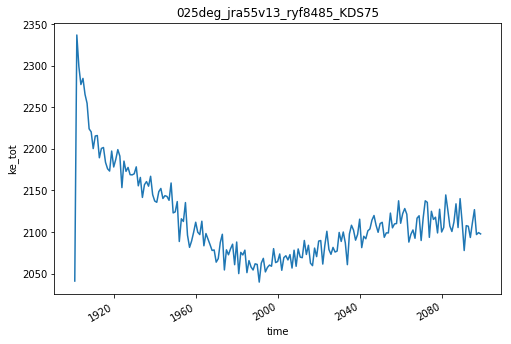

In [4]:
plt.figure(figsize=(8,5))
annual_average.plot()
plt.title(expt)

**Note that different ACCESS-OM2 simulations use differing time stamp conventions for their output. This may require you to offset the dates or adjust the time_units to obtain the time axis you would like.** 
